<h1>Multiple Linear Regression</h1>


Import the libraries and set the random seed.


In [1]:
# Import the libraries and set the random seed
import torch
from torch import nn
torch.manual_seed(1)

<h2 id="Prediction">Prediction</h2>


Set weight and bias.


In [2]:
# Set the weight and bias

w = torch.tensor([[2.0], [3.0]], requires_grad=True)
b = torch.tensor([[1.0]], requires_grad=True)

Define the parameters. <code>torch.mm</code> uses matrix multiplication instead of scaler multiplication.


In [3]:
# Define Prediction Function

def forward(x):
    yhat = torch.mm(x, w) + b
    return yhat

The function <code>forward</code> implements the following equation:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1_matrix_eq.png" width="600" alt="Matrix Linear Regression">


If we input a <i>1x2</i> tensor, because we have a <i>2x1</i> tensor as <code>w</code>, we will get a <i>1x1</i> tensor: 


In [4]:
# Calculate yhat

x = torch.tensor([[1.0, 2.0]])
yhat = forward(x)
print("The result: ", yhat)

The result:  tensor([[9.]], grad_fn=<AddBackward0>)


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1example.png" width="300" alt="Linear Regression Matrix Sample One">


# Each row of the following tensor represents a sample:


In [5]:
# Sample tensor X

X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])

In [6]:
# Make the prediction of X 

yhat = forward(X)
print("The result: ", yhat)

The result:  tensor([[ 6.],
        [ 9.],
        [12.]], grad_fn=<AddBackward0>)


<h2 id="Linear">Class Linear</h2>


We can use the linear class to make a prediction. You'll also use the linear class to build more complex models.


Let us create a model.


In [7]:
# Make a linear regression model using build-in function

model = nn.Linear(2, 1)

Make a prediction with the first sample:


In [8]:
# Make a prediction of x

yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[-0.3969]], grad_fn=<AddmmBackward0>)


In [9]:
model.state_dict()

OrderedDict([('weight', tensor([[ 0.3643, -0.3121]])),
             ('bias', tensor([-0.1371]))])

In [10]:
# Make a prediction of X

yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward0>)


The function performs matrix multiplication as shown in this image:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1multi_sample_example.png" width="600" alt="Linear Regression Matrix Sample One">


<!--Empty Space for separating topics-->


<h2 id="Cust">Build Custom Modules </h2>


Now, you'll build a custom module. You can make more complex models by using this method later. 


In [11]:
#Creating custom linear_regression class

class linear_regression(nn.Module):
    
    #Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    #Prediction function  
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Build a linear regression object. The input feature size is two. 


In [12]:
model = linear_regression(2, 1)

This will input the following equation:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1_matrix_eq.png" width="600" alt="Matrix Linear Regression">


You can see the randomly initialized parameters by using the <code>parameters()</code> method:


In [13]:
# Print model parameters

print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.3319, -0.6657]], requires_grad=True), Parameter containing:
tensor([0.4241], requires_grad=True)]


You can also see the parameters by using the <code>state_dict()</code> method:


In [14]:
# Print model parameters

print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[ 0.3319, -0.6657]])), ('linear.bias', tensor([0.4241]))])


Now we input a 1x2 tensor, and we will get a 1x1 tensor.


In [15]:
# Make a prediction of x

yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[-0.5754]], grad_fn=<AddmmBackward0>)


The shape of the output is shown in the following image: 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1_matrix_eq.png" width="600" alt="Matrix Linear Regression">


Make a prediction for multiple samples:


In [16]:
# Make a prediction of X

yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[ 0.0903],
        [-0.5754],
        [-1.2411]], grad_fn=<AddmmBackward0>)


The shape is shown in the following image: 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1Multi_sample.png" width="600" alt="Multiple Samples Linear Regression">


<h1>Linear Regression Multiple Outputs</h1> 


Import the following libraries:  


In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

Set the random seed:


In [18]:
torch.manual_seed(1)

<a id="ref0"></a>
<h2 align=center>Make Some Data </h2>

Create a dataset class with two-dimensional features and two targets: 

In [19]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

create a dataset object 


In [20]:
data_set=Data()

<a id="ref1"></a>
<h2 align=center>Create the Model, Optimizer, and Total Loss Function (cost)</h2>


Create a custom module:


In [21]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

Create a model.

In [22]:
model=linear_regression(2,2)

Create an optimizer object and set the learning rate to 0.1.

<img src="https://ibm.box.com/shared/static/f8hskuwrnctjg21agud69ddla0jkbef5.png" width="100," align="center">


In [23]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

Create the criterion function that calculates the total loss or cost:


In [24]:
criterion = nn.MSELoss()

Create a data loader object and set the batch_size to 5:


In [25]:
train_loader=DataLoader(dataset=data_set,batch_size=5)

<a id="ref2"></a>
<h2 align=center>Train the Model via Mini-Batch Gradient Descent </h2>


Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost.


In [26]:
LOSS=[]
 
epochs=100
   
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
     


    

Plot the cost:


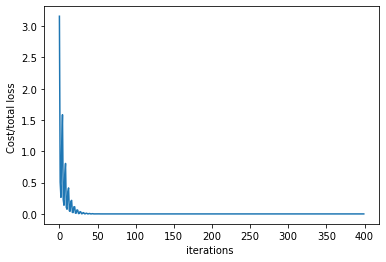

In [27]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()